In [4]:
!pip install selenium -q

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import numpy as np
import pandas as pd
import logging
import sys
import re 

In [5]:
s = Service("C:\\Users\\Dell\\Desktop\\setting\\chromedriver.exe")  ##download chromedirver to run
# logging.basicConfig(format='%asctimne)s | %(levelname)s :  %(message)s', level=logging.INFO, stream=sys.stdout)

In [6]:
def crawl_page(page_index):
    driver = webdriver.Chrome(service=s)
    driver.get(f"https://shopee.vn/search?keyword=tai%20nghe%20bluetooth&page={page_index}&sortBy=sales")
    time.sleep(3)

    for n in range(1,6):
        driver.execute_script("window.scrollTo({top: "+str(n*1000)+",behavior: 'smooth'})")
        time.sleep(3)


    name = []
    for e in driver.find_elements(by=By.CLASS_NAME, value='dpiR4u'):
        name_item = e.text.split('\n')
        name.append(name_item[0])  

    selling_price_text = []
    for e in driver.find_elements(by=By.CLASS_NAME, value='hpDKMN'):
        price = e.text
        selling_price_text.append(price)
        
    original_price = []
    selling_price_1 = []
    selling_price_2 = []

    regex = re.compile('[^a-zA-Z]')
    for i in selling_price_text:
        if i.find('-') > 0:
            slit_price = i.split(' - ')
            s1 = ''.join(filter(str.isalnum, slit_price[0]))
            s2 = ''.join(filter(str.isalnum, slit_price[1]))
            selling_price_1.append(s1)
            selling_price_2.append(s2)
            original_price.append('0')
        else:
            slit_price = i.split('\n')
            s1 = ''.join(filter(str.isalnum, slit_price[0]))
            try:
                s2 = ''.join(filter(str.isalnum, slit_price[1]))
            except:
                s2 = s1
            selling_price_1.append(s2)
            selling_price_2.append('0')
            original_price.append(s1)
            
    seller_location = []
    for e in driver.find_elements(by=By.CLASS_NAME, value='zGGwiV'):
        location = e.text
        seller_location.append(location)
    driver.close()
    df = pd.DataFrame({'name':name , 'original_price': original_price, 'selling_price_1': selling_price_1, 'selling_price_2': selling_price_2, 'location': seller_location})
    return df

In [7]:
df_shopee_crawl = []
page = 0
while True:
    try:
        df = crawl_page(page)
        df_shopee_crawl.append(df)
        print(f'Page {page} done!')
        page += 1
    except:
        break

df_shopee_crawl = pd.concat(df_shopee_crawl)
df_shopee_crawl

Page 0 done!


,name,original_price,selling_price_1,selling_price_2,location
0,Tai Nghe Bluetooth i12 TWS 5.0 Không Dây Cảm Ứ...,200000,129000,0,Hà Nội
1,Tai Nghe Bluetooth P2 Cao Cấp Định Vị Đổi Tên ...,0,244000,269000,Hà Nội
2,Tai Nghe Bluetooth Không Dây TWS 5.0 Bản Cao C...,450000,299000,0,Hà Nội
3,Tai nghe Bluetooth AMOI F9 TWS 5.0 bản QUỐC TẾ...,250000,165000,0,Hà Nội
4,Tai Nghe Bluetooth QP2 TWS Không Dây Bản Quốc ...,400000,269000,0,Hà Nội
5,Tai Nghe Bluetooth 5.0 Không Dây Mini Pro 4/5 ...,299000,169000,0,Hà Nội
6,Tai Nghe Bluetooth Công Nghệ Mới Âm Thanh Sống...,150000,115000,0,TP. Hồ Chí Minh
7,Tai Nghe Bluetooth J12 TWS 5.0 Có Micro Không ...,150000,79000,0,TP. Hồ Chí Minh
8,Tai Nghe Bluetooth J12 TWS 5.0 Có Micro Không ...,150000,75000,0,TP. Hồ Chí Minh
9,Tai Nghe Bluetooth i12 TWS 5.0 Không Dây Cảm Ứ...,200000,129000,0,Hà Nội


In [5]:
# df_shopee_crawl.to_csv('raw.csv')

In [30]:
df_shopee_crawl['selling_price_1'] = pd.to_numeric(df_shopee_crawl['selling_price_1'])
df_shopee_crawl['selling_price_2'] = pd.to_numeric(df_shopee_crawl['selling_price_2'])

con = [df_shopee_crawl['selling_price_2'] == 0, df_shopee_crawl['selling_price_2'] != 0]
val = [df_shopee_crawl['selling_price_1'] , (df_shopee_crawl['selling_price_1'] + df_shopee_crawl['selling_price_2'])/2]

df_shopee_crawl['selling_price'] = np.select(con,val,0)

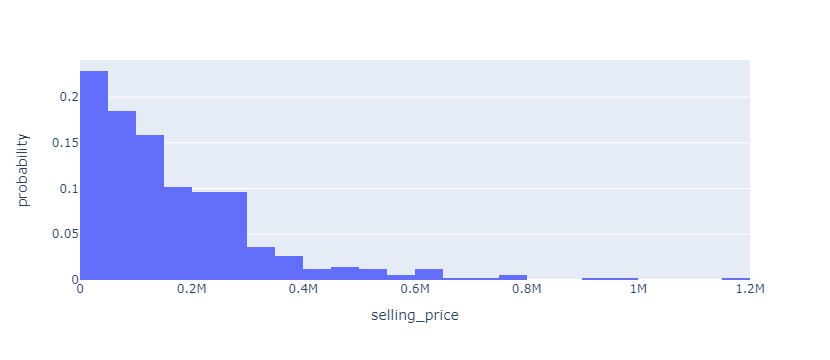

In [31]:
import plotly.express as px
fig = px.histogram(df_shopee_crawl, x='selling_price', histnorm='probability')
fig.show()

In [32]:
df_filter = df_shopee_crawl[(df_shopee_crawl['location'] == 'Hà Nội') | (df_shopee_crawl['location'] == 'TP. Hồ Chí Minh') |(df_shopee_crawl['location'] == 'Nước ngoài') ]

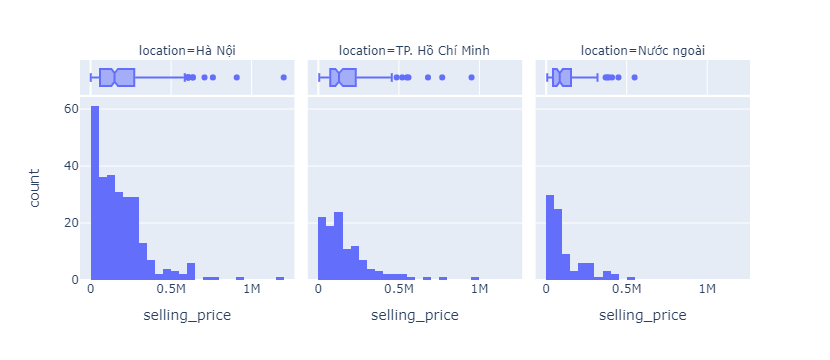

Hà Nội: The mean is 184,057.73
Hà Nội: The standard deviation is 169,113.55
TP. Hồ Chí Minh: The mean is 176,458.35
TP. Hồ Chí Minh: The standard deviation is 160,794.21
Nước ngoài: The mean is 122,504.33
Nước ngoài: The standard deviation is 115,486.01


In [39]:
fig = px.histogram(df_filter, x='selling_price',
                   facet_col = 'location', marginal="box", hover_data=df_filter.columns)
fig.show()

for i in df_filter['location'].unique():
    mean = "{:,.2f}".format(np.mean(df_filter[df_filter['location'] == i]['selling_price']))
    st_dev = "{:,.2f}".format(np.std(df_filter[df_filter['location'] == i]['selling_price']))

    print(f"{i}: The mean is {mean}")
    print(f"{i}: The standard deviation is {st_dev}")
